# Group Component 1: Data Preprocessing

## Preliminary Changes to Data

### 1. Load Dataset
- Loaded the data from `kyao0603_A1_CleanDataset.csv` using `pd.read_csv()`.

### 2. Handle Missing Values
- Replaced `'?'` with `NaN`.
- Filled missing values in `'Loan_Types'` using the mode.
- Replaced `'_______'` in `Customer_Occupation` with the previous valid value using forward fill.

### 3. Data Cleaning
- Converted `Delayed_Payments` to numeric, and filled missing values with the median.
- Removed invalid values:
  - `Customer_Age` > 100
  - `Credit_Cards` > 21
  - `Loans` > 22, etc.

### 4. Transformations
- Converted `Credit_History_Age` from "Years and Months" to total months.
- Filled missing values in `Credit_History_Age` with the median.

### 5. Final Steps
- Saved the cleaned dataset as `cleaned_dataset.csv`.
- Performed a final check to ensure no missing values remain.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'kyao0603_A1_CleanDataset.csv'  
data = pd.read_csv(file_path)

# Step 1: Replace '?' with NaN to handle missing values
data.replace('?', pd.NA, inplace=True)


# Step 2: Fill missing values for categorical and numerical columns
# Fill categorical column 'Loan_Types' with the mode
data['Loan_Types'].fillna(data['Loan_Types'].mode()[0], inplace=True)

# Updating the code to replace '_______' in the 'Customer_Occupation' column with the previous row's occupation

# Fill '_______' in 'Customer_Occupation' with the previous valid occupation
data['Customer_Occupation'] = data['Customer_Occupation'].replace('_______', pd.NA)
data['Customer_Occupation'].fillna(method='ffill', inplace=True)
# Convert 'Delayed_Payments' column to numeric, forcing errors to NaN
data['Delayed_Payments'] = pd.to_numeric(data['Delayed_Payments'], errors='coerce')

# Fill missing values in 'Delayed_Payments' with the median
data['Delayed_Payments'].fillna(data['Delayed_Payments'].median(), inplace=True)

# Proceed with other cleaning steps

# Step 3: Remove invalid ages (e.g., 500)
data = data[data['Customer_Age'] < 100]
data = data[data['Credit_Cards'] < 21]
data = data[data['Interest_Rate'] < 64]
data = data[data['Loans'] < 22]
data = data[data['Delayed_Payments'] < 46]
data = data[data['Credit_Inquiries'] < 25]
data = data[data['Interest_Rate'] < 64]

# Function to convert 'Years and Months' string format to total months for 'Credit_History_Age'
def convert_to_months(age_str):
    if pd.isna(age_str):
        return pd.NA
    parts = age_str.split()
    years = int(parts[0]) if 'Years' in parts else 0
    months = int(parts[3]) if 'Months' in parts else 0
    return years * 12 + months

# Apply conversion to 'Credit_History_Age' and fill missing values with median
data['Credit_History_Age'] = data['Credit_History_Age'].apply(convert_to_months)
data['Credit_History_Age'].fillna(data['Credit_History_Age'].median(), inplace=True)

# Ensure all columns are numeric before filling missing values with median
# Use pd.to_numeric to coerce non-numeric values into NaN, and then fill with median
numeric_columns = ['Delayed_Payments', 'Monthly_Investment', 'Monthly_Balance']

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    data[column].fillna(data[column].median(), inplace=True)

# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_dataset.csv', index=False)

# Final check to ensure no missing values remain
missing_values_final_check = data.isnull().sum()
print(missing_values_final_check)
data.head(200)

/var/folders/f0/fk6gfg416t9gg623lsmf20nc0000gn/T/ipykernel_27946/1938142375.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Loan_Types'].fillna(data['Loan_Types'].mode()[0], inplace=True)
/var/folders/f0/fk6gfg416t9gg623lsmf20nc0000gn/T/ipykernel_27946/1938142375.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

Credit_Score_index      0
Record_ID               0
Customer_ID             0
Record_Month            0
Customer_Age            0
Customer_SSN            0
Customer_Occupation     0
Annual_Income           0
Monthly_Salary          0
Bank_Accounts           0
Credit_Cards            0
Interest_Rate           0
Loans                   0
Loan_Types              0
Payment_Delay_Days      0
Delayed_Payments        0
Credit_Limit_Changes    0
Credit_Inquiries        0
Credit_Mix              0
Outstanding_Debt        0
Credit_Utilization      0
Credit_History_Age      0
Min_Amount_Payment      0
Monthly_EMI             0
Monthly_Investment      0
Payment_Behavior        0
Monthly_Balance         0
Credit_Score            0
dtype: int64


,Credit_Score_index,Record_ID,Customer_ID,Record_Month,Customer_Age,Customer_SSN,Customer_Occupation,Annual_Income,Monthly_Salary,Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization,Credit_History_Age,Min_Amount_Payment,Monthly_EMI,Monthly_Investment,Payment_Behavior,Monthly_Balance,Credit_Score
0,0,0x1602,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Standard,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,1,0x1603,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,3101.658457,3.0,...,Good,809.98,31.944960,219.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
3,3,0x1605,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,3101.658457,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,4,0x1606,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,5,0x1607,CUS_0xd40,June,23,821-00-0265,Scientist,19114.12,3101.658457,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,227,0x1755,CUS_0xbffe,April,40,311-13-7309,Architect,28572.39,3101.658457,6.0,...,Standard,400.07,34.714561,366.0,Yes,69.602920,25.993462,High_spent_Medium_value_payments,375.406867,Standard
228,228,0x1756,CUS_0xbffe,May,40,311-13-7309,Architect,28572.39,3101.658457,6.0,...,Standard,400.07,37.504552,367.0,Yes,69.602920,61.628109,High_spent_Medium_value_payments,339.772220,Standard
230,230,0x1758,CUS_0xbffe,July,40,311-13-7309,Architect,28572.39,2210.032500,6.0,...,Standard,400.07,35.025883,219.0,Yes,69.602920,76.607809,Low_spent_Small_value_payments,364.792521,Standard
231,231,0x1759,CUS_0xbffe,August,40,311-13-7309,Architect,6515990.00,2210.032500,6.0,...,Standard,400.07,23.177617,370.0,Yes,69.602920,51.830859,High_spent_Large_value_payments,339.569471,Standard


## Data Down Sample
- Describe the strategies used for splitting the data.
- Techniques like temporal validation or stratified sampling could be mentioned.


Unique values count:
Credit_Score_index      86833
Record_ID               86833
Customer_ID             12496
Record_Month                8
Customer_Age               45
Customer_SSN            12497
Customer_Occupation        15
Annual_Income           13354
Monthly_Salary          13149
Bank_Accounts             859
Credit_Cards               17
Interest_Rate              36
Loans                      13
Loan_Types               6258
Payment_Delay_Days         68
Delayed_Payments           29
Credit_Limit_Changes     3586
Credit_Inquiries           18
Credit_Mix                  3
Outstanding_Debt        12199
Credit_Utilization      86832
Credit_History_Age        404
Min_Amount_Payment          3
Monthly_EMI             14536
Monthly_Investment      79115
Payment_Behavior            6
Monthly_Balance         85764
Credit_Score                3
dtype: int64

Column Value Distributions

Value distribution for column 'Credit_Score_index':
Credit_Score_index
0        1
66601    1
666

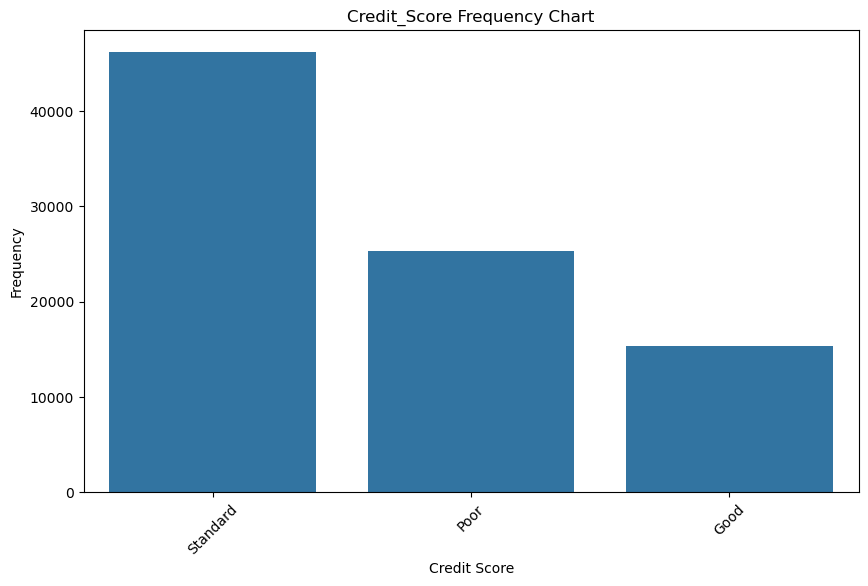

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_value_counts(df, columns, title):
    print(f"\n{title}")
    for column in columns:
        print(f"\nValue distribution for column '{column}':")
        print(df[column].value_counts(dropna=False))

def main():
    # Load CSV file
    file_path = 'cleaned_dataset.csv'  # Please replace with your CSV file path
    df = pd.read_csv(file_path)

    # Display the number of unique values in each column (helps detect class imbalance)
    print("\nUnique values count:")
    print(df.nunique())

    

    # Output the value distribution of each column (helps detect bias)
    print_value_counts(df, df.columns, "Column Value Distributions")

    # Detect the distribution of categorical columns (category bias detection)
    categorical_cols = df.select_dtypes(include=['object']).columns
    print_value_counts(df, categorical_cols, "Categorical Columns Distributions")

    # Plot frequency chart for 'Credit_Score' column
    if 'Credit_Score' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x='Credit_Score', data=df, order=df['Credit_Score'].value_counts().index)
        plt.title('Credit_Score Frequency Chart')
        plt.xlabel('Credit Score')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels if category names are too long
        plt.show()
    else:
        print("'Credit_Score' column does not exist in the dataset.")

if __name__ == '__main__':
    main()

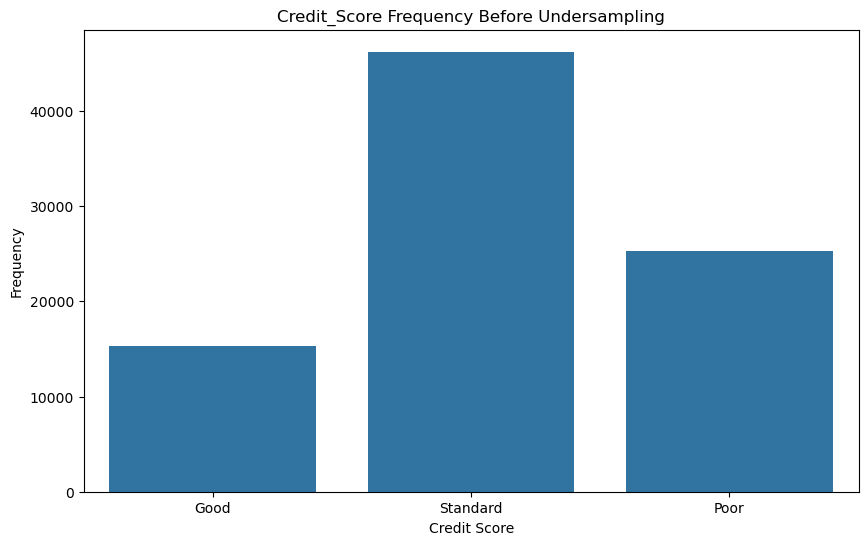

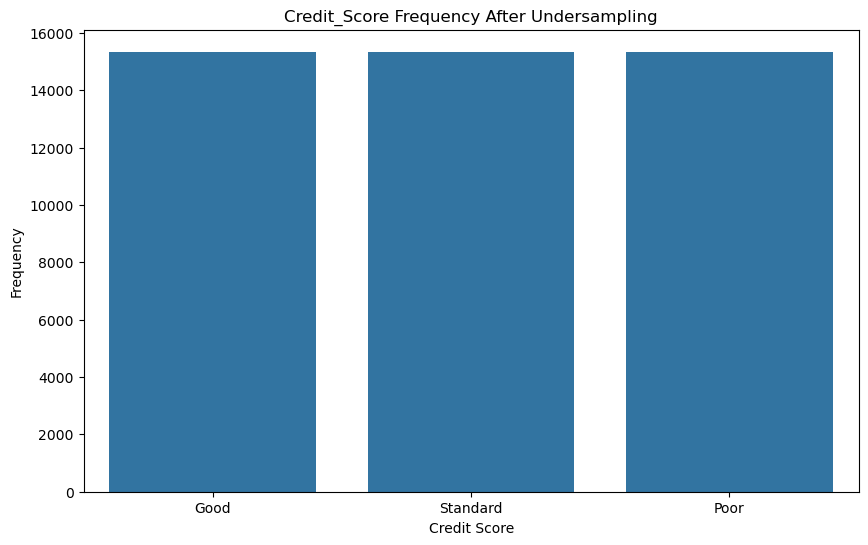

,Credit_Score_index,Record_ID,Customer_ID,Record_Month,Customer_Age,Customer_SSN,Customer_Occupation,Annual_Income,Monthly_Salary,Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization,Credit_History_Age,Min_Amount_Payment,Monthly_EMI,Monthly_Investment,Payment_Behavior,Monthly_Balance,Credit_Score
44650,51308,0x142a2,CUS_0x914e,May,55,748-44-0227,Musician,89384.910,3101.658457,1.0,...,Good,1041.11,29.326066,368.0,NM,118.534950,164.323010,High_spent_Large_value_payments,723.016290,Good
30437,34979,0xe2f5,CUS_0xc70e,April,37,937-90-1635,Scientist,97583.430,7846.952500,7.0,...,Good,1296.80,38.979535,356.0,No,46.511789,299.043233,Low_spent_Large_value_payments,709.140228,Good
52348,60156,0x1767a,CUS_0x991d,May,55,669-84-2094,Musician,115105.560,9684.130000,4.0,...,Standard,695.19,32.135691,215.0,Yes,289.628748,750.877290,Low_spent_Large_value_payments,197.906962,Good
4904,5633,0x3703,CUS_0xb67c,February,49,432-02-3211,Entrepreneur,44747.540,3101.658457,1.0,...,Good,833.10,39.792025,233.0,No,48.885394,317.375863,Low_spent_Medium_value_payments,312.234910,Good
34199,39303,0xfc49,CUS_0xbea3,August,15,127-36-3685,Lawyer,23445.470,1870.789167,4.0,...,Standard,1455.88,23.044037,192.0,Yes,109.792140,114.738022,Low_spent_Small_value_payments,252.548755,Good
86460,99573,0x25d6f,CUS_0x1b3b,June,49,473-62-8692,Lawyer,76624.480,6123.373333,0.0,...,Good,781.42,30.716736,214.0,No,0.000000,94.987608,High_spent_Large_value_payments,757.349725,Good
34653,39840,0xff72,CUS_0x71e2,January,49,710-17-4435,Engineer,28074.060,2139.505000,1.0,...,Good,577.79,36.178322,374.0,No,15.500163,168.734724,Low_spent_Medium_value_payments,309.715613,Good
42909,49299,0x136dd,CUS_0x8b78,April,54,267-33-6948,Writer,80027.680,6652.973333,3.0,...,Good,21.75,31.779242,328.0,No,204.154048,536.542614,Low_spent_Small_value_payments,214.600672,Good
5522,6352,0x3b3a,CUS_0x9c30,January,51,868-57-3911,Journalist,84031.020,3101.658457,5.0,...,Good,1325.84,28.240548,305.0,NM,0.000000,409.586895,High_spent_Small_value_payments,552.571605,Good
81698,94087,0x23d49,CUS_0xbb33,August,48,#F\%$D@*&8,Media_Manager,100971.600,8286.300000,2.0,...,Standard,1138.38,34.169242,209.0,No,48.697558,837.724993,Low_spent_Medium_value_payments,222.207449,Good


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# 加载数据集
file_path = 'cleaned_dataset.csv'  # 修改为你的CSV文件路径
df = pd.read_csv(file_path)

# 首先绘制原始数据的Credit_Score频数图
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', data=df)
plt.title('Credit_Score Frequency Before Undersampling')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# 下采样处理
# 找到每个类别的最小数量
min_class_count = df['Credit_Score'].value_counts().min()

# 对每个类别进行下采样，使得所有类别的样本数量相等
df_downsampled = pd.concat([
    resample(df[df['Credit_Score'] == cls],
             replace=False,   # 不放回采样
             n_samples=min_class_count,  # 每个类别的样本数量
             random_state=42)  # 固定随机种子以确保结果可复现
    for cls in df['Credit_Score'].unique()
])

# 下采样之后绘制新的Credit_Score频数图
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', data=df_downsampled)
plt.title('Credit_Score Frequency After Undersampling')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# 分离特征和目标变量
X = df_downsampled.drop('Credit_Score', axis=1)
y = df_downsampled['Credit_Score']

# 分层抽样分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 将分割后的数据保存为CSV文件
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# 显示处理后的前20行数据
df_downsampled.head(20)

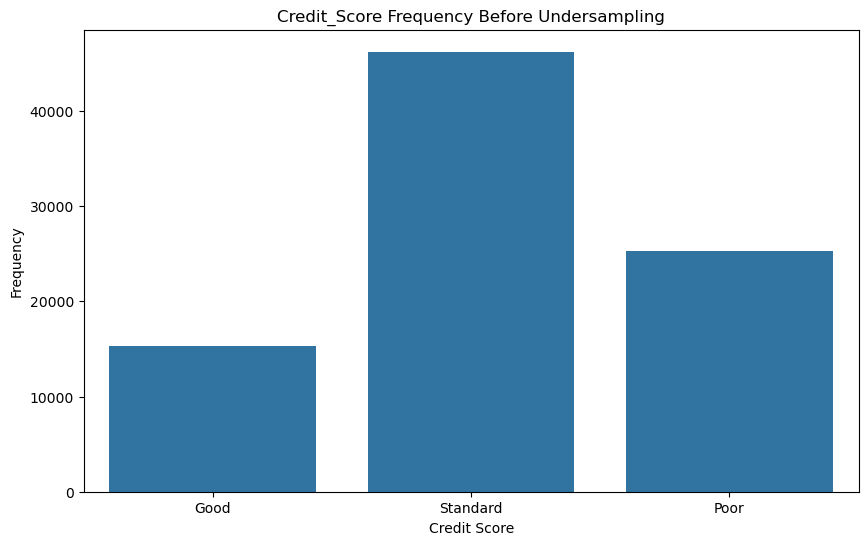

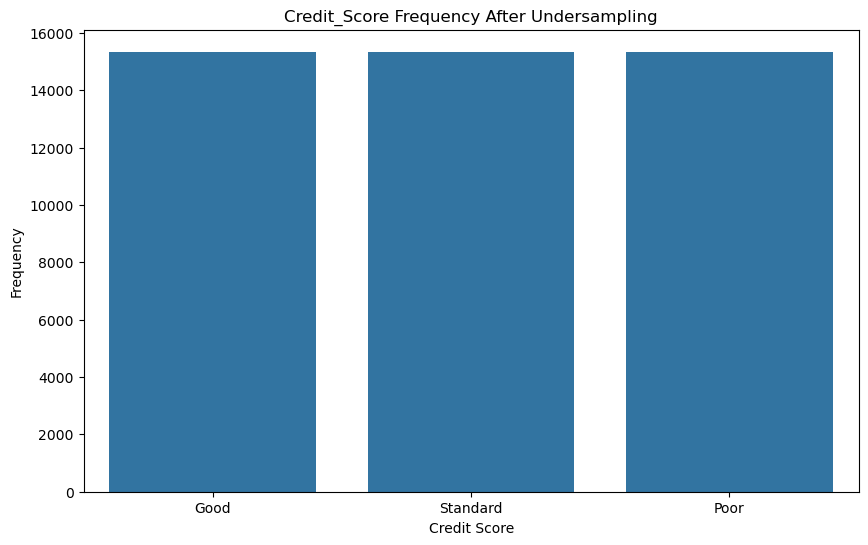

,Credit_Score_index,Record_ID,Customer_ID,Record_Month,Customer_Age,Customer_SSN,Customer_Occupation,Annual_Income,Monthly_Salary,Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization,Credit_History_Age,Min_Amount_Payment,Monthly_EMI,Monthly_Investment,Payment_Behavior,Monthly_Balance,Credit_Score
44650,51308,0x142a2,CUS_0x914e,May,55,748-44-0227,Musician,89384.910,3101.658457,1.0,...,Good,1041.11,29.326066,368.0,NM,118.534950,164.323010,High_spent_Large_value_payments,723.016290,Good
30437,34979,0xe2f5,CUS_0xc70e,April,37,937-90-1635,Scientist,97583.430,7846.952500,7.0,...,Good,1296.80,38.979535,356.0,No,46.511789,299.043233,Low_spent_Large_value_payments,709.140228,Good
52348,60156,0x1767a,CUS_0x991d,May,55,669-84-2094,Musician,115105.560,9684.130000,4.0,...,Standard,695.19,32.135691,215.0,Yes,289.628748,750.877290,Low_spent_Large_value_payments,197.906962,Good
4904,5633,0x3703,CUS_0xb67c,February,49,432-02-3211,Entrepreneur,44747.540,3101.658457,1.0,...,Good,833.10,39.792025,233.0,No,48.885394,317.375863,Low_spent_Medium_value_payments,312.234910,Good
34199,39303,0xfc49,CUS_0xbea3,August,15,127-36-3685,Lawyer,23445.470,1870.789167,4.0,...,Standard,1455.88,23.044037,192.0,Yes,109.792140,114.738022,Low_spent_Small_value_payments,252.548755,Good
86460,99573,0x25d6f,CUS_0x1b3b,June,49,473-62-8692,Lawyer,76624.480,6123.373333,0.0,...,Good,781.42,30.716736,214.0,No,0.000000,94.987608,High_spent_Large_value_payments,757.349725,Good
34653,39840,0xff72,CUS_0x71e2,January,49,710-17-4435,Engineer,28074.060,2139.505000,1.0,...,Good,577.79,36.178322,374.0,No,15.500163,168.734724,Low_spent_Medium_value_payments,309.715613,Good
42909,49299,0x136dd,CUS_0x8b78,April,54,267-33-6948,Writer,80027.680,6652.973333,3.0,...,Good,21.75,31.779242,328.0,No,204.154048,536.542614,Low_spent_Small_value_payments,214.600672,Good
5522,6352,0x3b3a,CUS_0x9c30,January,51,868-57-3911,Journalist,84031.020,3101.658457,5.0,...,Good,1325.84,28.240548,305.0,NM,0.000000,409.586895,High_spent_Small_value_payments,552.571605,Good
81698,94087,0x23d49,CUS_0xbb33,August,48,#F\%$D@*&8,Media_Manager,100971.600,8286.300000,2.0,...,Standard,1138.38,34.169242,209.0,No,48.697558,837.724993,Low_spent_Medium_value_payments,222.207449,Good


In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

# 加载数据集
file_path = 'cleaned_dataset.csv'  # Please replace with your CSV file path
df = pd.read_csv(file_path)

# 首先绘制原始数据的Credit_Score频数图
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', data=df)
plt.title('Credit_Score Frequency Before Undersampling')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# 下采样处理
# 找到每个类别的最小数量
min_class_count = df['Credit_Score'].value_counts().min()

# 对每个类别进行下采样，使得所有类别的样本数量相等
df_downsampled = pd.concat([
    resample(df[df['Credit_Score'] == cls],
             replace=False,   # 不放回采样
             n_samples=min_class_count,  # 每个类别的样本数量
             random_state=42)  # 固定随机种子以确保结果可复现
    for cls in df['Credit_Score'].unique()
])

#下采样之后绘制新的Credit_Score频数图
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', data=df_downsampled)
plt.title('Credit_Score Frequency After Undersampling')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

df_downsampled.to_csv('cleaned_dataset1.csv', index=False)

df_downsampled.head(20)


In [5]:
data=df_downsampled
data_knn=df_downsampled

In [6]:
data.describe

<bound method NDFrame.describe of        Credit_Score_index Record_ID Customer_ID Record_Month  Customer_Age  \
44650               51308   0x142a2  CUS_0x914e          May            55   
30437               34979    0xe2f5  CUS_0xc70e        April            37   
52348               60156   0x1767a  CUS_0x991d          May            55   
4904                 5633    0x3703  CUS_0xb67c     February            49   
34199               39303    0xfc49  CUS_0xbea3       August            15   
...                   ...       ...         ...          ...           ...   
56041               64479   0x18fcd  CUS_0xc272       August            45   
73662               84809   0x206ef  CUS_0xa579     February            20   
18424               21172    0x920e  CUS_0x9281          May            36   
64052               73731   0x1c605  CUS_0x3561        April            30   
13012               14966    0x6db0  CUS_0x8e96         July            43   

      Customer_SSN Customer_O

### data split

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 分离特征和目标变量
X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [8]:
data.head()

,Credit_Score_index,Record_ID,Customer_ID,Record_Month,Customer_Age,Customer_SSN,Customer_Occupation,Annual_Income,Monthly_Salary,Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization,Credit_History_Age,Min_Amount_Payment,Monthly_EMI,Monthly_Investment,Payment_Behavior,Monthly_Balance,Credit_Score
44650,51308,0x142a2,CUS_0x914e,May,55,748-44-0227,Musician,89384.91,3101.658457,1.0,...,Good,1041.11,29.326066,368.0,NM,118.534950,164.323010,High_spent_Large_value_payments,723.016290,Good
30437,34979,0xe2f5,CUS_0xc70e,April,37,937-90-1635,Scientist,97583.43,7846.952500,7.0,...,Good,1296.80,38.979535,356.0,No,46.511789,299.043233,Low_spent_Large_value_payments,709.140228,Good
52348,60156,0x1767a,CUS_0x991d,May,55,669-84-2094,Musician,115105.56,9684.130000,4.0,...,Standard,695.19,32.135691,215.0,Yes,289.628748,750.877290,Low_spent_Large_value_payments,197.906962,Good
4904,5633,0x3703,CUS_0xb67c,February,49,432-02-3211,Entrepreneur,44747.54,3101.658457,1.0,...,Good,833.10,39.792025,233.0,No,48.885394,317.375863,Low_spent_Medium_value_payments,312.234910,Good
34199,39303,0xfc49,CUS_0xbea3,August,15,127-36-3685,Lawyer,23445.47,1870.789167,4.0,...,Standard,1455.88,23.044037,192.0,Yes,109.792140,114.738022,Low_spent_Small_value_payments,252.548755,Good


## The end of group component 1 section
---

# Individual Component
***

## Title: Individual component of processing the Credit_Score with SVM Model

--- jshe0116

### Import library and filt the data

use `selected columns` to filt the data from the group cleanded data

and `reset_index` make shur the index is correct

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt

# select colums
selected_columns_svm = [
    'Annual_Income', 'Monthly_Salary', 'Outstanding_Debt', 'Credit_Utilization',
    'Credit_History_Age', 'Delayed_Payments', 'Payment_Behavior',
    'Customer_Occupation', 'Credit_Inquiries', 'Loans', 'Payment_Delay_Days',
    'Bank_Accounts', 'Credit_Cards', 'Min_Amount_Payment',
    'Monthly_EMI', 'Monthly_Investment', 'Monthly_Balance'
]

# data filt
X_train_filtered_svm = X_train[selected_columns_svm]
X_test_filtered_svm = X_test[selected_columns_svm]

X_train_filtered_svm = X_train_filtered_svm.reset_index(drop=True)
X_test_filtered_svm=X_test_filtered_svm.reset_index(drop=True)

In [10]:
X_train_filtered_svm

,Annual_Income,Monthly_Salary,Outstanding_Debt,Credit_Utilization,Credit_History_Age,Delayed_Payments,Payment_Behavior,Customer_Occupation,Credit_Inquiries,Loans,Payment_Delay_Days,Bank_Accounts,Credit_Cards,Min_Amount_Payment,Monthly_EMI,Monthly_Investment,Monthly_Balance
0,28074.06,2139.505000,577.79,32.145873,377.0,5.0,Low_spent_Small_value_payments,Engineer,0.0,1,3,1.0,6,No,15.500163,236.354118,252.096219
1,56131.48,4946.623333,1235.48,28.479435,294.0,8.0,High_spent_Medium_value_payments,Developer,2.0,4,15,0.0,4,No,141.986536,118.749396,483.926401
2,103515.51,8334.292500,60.25,37.636430,347.0,14.0,High_spent_Large_value_payments,Engineer,1.0,4,6,1.0,3,No,211.629882,122.298101,739.501267
3,42355.28,3512.606667,778.49,23.514858,386.0,0.0,High_spent_Small_value_payments,Writer,2.0,2,0,2.0,4,No,52.216711,242.414113,316.629842
4,56270.46,3101.658457,1570.56,32.641203,150.0,19.0,Low_spent_Small_value_payments,Doctor,8.0,2,9,6.0,3,NM,79.630899,412.456401,281.533200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32206,112302.04,9220.503333,734.94,28.199622,362.0,12.0,Low_spent_Medium_value_payments,Mechanic,4.0,3,12,4.0,6,No,269.761073,422.733311,509.555950
32207,26733.39,2071.782500,1413.64,34.357500,314.0,13.0,High_spent_Large_value_payments,Lawyer,1.0,4,22,8.0,6,No,49.942172,20.141363,377.094715
32208,108142.14,3101.658457,261.59,34.939826,296.0,8.0,Low_spent_Medium_value_payments,Architect,3.0,1,14,1.0,2,No,48.514758,559.270089,600.299653
32209,16916.38,3101.658457,1677.29,30.758924,146.0,19.0,High_spent_Small_value_payments,Media_Manager,12.0,5,29,3.0,7,Yes,57.367994,97.871487,245.430352


### Encoding data
use the `LabelEncoder` to encode the Y

In [11]:
# Encoding y
label_encoder_svm = LabelEncoder()
y_train_encoded_svm = label_encoder_svm.fit_transform(y_train)
y_test_encoded_svm = label_encoder_svm.transform(y_test)

In [12]:
categorical_features_svm = ['Payment_Behavior','Customer_Occupation','Min_Amount_Payment']
numerical_features_svm = [col for col in X_train_filtered_svm.columns if col not in categorical_features_svm]

### Init the SVM model

In [13]:
# set a processer to process the different data type
preprocessor_svm = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_svm),
        ('cat', OneHotEncoder(), categorical_features_svm)
    ])

In [14]:
#Builiig the basic model
pipeline_svm = Pipeline(steps=[('preprocessor_svm', preprocessor_svm.set_params(n_jobs=-1)),
                           ('classifier', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True))])

In [15]:
#Train the model
pipeline_svm.fit(X_train_filtered_svm, y_train_encoded_svm)

Pipeline(steps=[('preprocessor_svm',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num', StandardScaler(),
                                                  ['Annual_Income',
                                                   'Monthly_Salary',
                                                   'Outstanding_Debt',
                                                   'Credit_Utilization',
                                                   'Credit_History_Age',
                                                   'Delayed_Payments',
                                                   'Credit_Inquiries', 'Loans',
                                                   'Payment_Delay_Days',
                                                   'Bank_Accounts',
                                                   'Credit_Cards',
                                                   'Monthly_EMI',
                                                   'Monthly_Investment',
                                                   'Monthly_Balance']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Payment_Behavior',
                                                   'Customer_Occupation',
                                                   'Min_Amount_Payment'])])),
                ('classifier', SVC(probability=True))])

### Use random search to optimize the model

In [16]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions_svm = {
    'classifier__C': np.logspace(-2, 2, 10),  # C Use log space
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']  
}

# Use RandomizedSearchCV to optimize
random_search_svm = RandomizedSearchCV(
    pipeline_svm, 
    param_distributions_svm,  #import
    n_iter=7,  # Search Times
    refit=True, 
    verbose=2, 
    cv=5,  # Cross times
    n_jobs=-1,  # Use all cpu
    random_state=42  # seed
)

# run the optimze
random_search_svm.fit(X_train_filtered_svm, y_train_encoded_svm)

# get best model
best_model_svm = random_search_svm.best_estimator_

# use the best model to jud
y_pred_svm = best_model_svm.predict(X_test_filtered_svm)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


KeyboardInterrupt: 

### Dump the model for security

In [ ]:
import joblib
joblib.dump(best_model_svm,'Best_model_svm.pkl')

In [ ]:
# print value
y_pred_svm = best_model_svm.predict(X_test_filtered_svm)
print("Accuracy:", accuracy_score(y_test_encoded_svm, y_pred_svm))
print(classification_report(y_test_encoded_svm, y_pred_svm))

### plot the data

#### confusion_matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 计算混淆矩阵
cm = confusion_matrix(X_test_filtered_svm, y_pred_svm)

# 使用 sklearn 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np


from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = best_model_svm.predict_proba(X_test)

# ROC Curve
plt.figure()
for i in range(len(best_model_svm.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {best_model_svm.classes_[i]} (AUC = {roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## End of jshe0116 souce code

## Title: Individual component of processing the Credit_Score with RF Model
-- zzha0118

### Data processing

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop useless col
X_test_process_rf = X_test.drop(columns=['Record_ID', 'Customer_ID', 'Customer_SSN'])
X_train_process_rf = X_train.drop(columns=['Record_ID', 'Customer_ID', 'Customer_SSN'])

#df_processed = df.drop(columns=['Credit_Mix'])
X_test_process_rf = X_test_process_rf.drop(columns=['Credit_Mix'])
X_train_process_rf=X_train_process_rf.drop(columns=['Credit_Mix'])

# Label Encoding
label_encoder = LabelEncoder()
for col in X_test_process_rf.columns:
    if X_test_process_rf[col].dtype == 'object':
        X_test_process_rf[col] = label_encoder.fit_transform(X_test_process_rf[col])
        
for col in X_train_process_rf.columns:
    if X_train_process_rf[col].dtype == 'object':
        X_train_process_rf[col] = label_encoder.fit_transform(X_train_process_rf[col])
        
# Encode Y
y_train_rf=label_encoder.fit_transform(y_train)
y_test_rf=label_encoder.transform(y_test)


In [ ]:
X_train_process_rf.head(10)

In [ ]:
X_test_process_rf.head(1)

In [ ]:
y_train_rf

In [21]:
# scal the data
scaler = StandardScaler()
X_train_rf = scaler.fit_transform(X_train_process_rf)
X_test_rf = scaler.transform(X_test_process_rf)

### Inital Model Development and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# init 
rf_model = RandomForestClassifier(random_state=42)

# training the model
rf_model.fit(X_train_rf, y_train_rf)

# run model test
y_pred_rf = rf_model.predict(X_test_rf)
y_pred_proba_rf = rf_model.predict_proba(X_test_rf)

# culc accuracy 
accuracy = accuracy_score(y_test_rf, y_pred_rf)

# AUC
y_test_binarized_rf = label_binarize(y_test_rf, classes=[0, 1, 2])  # 如果有3个类别
auc_score = roc_auc_score(y_test_binarized_rf, y_pred_proba_rf, multi_class="ovr")

# Report
classification_rep_rf = classification_report(y_test_rf, y_pred_rf)

print(f'accuracy: {accuracy}')
print(f'AUC: {auc_score}')
print(f'classification:\n{classification_rep_rf}')

### Model Optimization

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import RandomizedSearchCV


# Param For search
param_dist_optimized = {
    'n_estimators': [500, 1000],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': ['balanced_subsample']
}

# 运行 RandomizedSearchCV 进行超参数优化
random_search_optimized = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                             param_distributions=param_dist_optimized,
                                             n_iter=20,
                                             cv=5,
                                             verbose=2,
                                             random_state=42,
                                             n_jobs=-1,
                                             scoring='f1_weighted')

# Train model
random_search_optimized.fit(X_train_rf, y_train_rf)

# get the best model
best_random_model_optimized = random_search_optimized.best_estimator_
best_random_model_optimized.fit(X_train_rf, y_train_rf)

# run the test
y_pred_optimized = best_random_model_optimized.predict(X_test_rf)
y_pred_proba_optimized = best_random_model_optimized.predict_proba(X_test_rf)

# evulate the model
accuracy_optimized = accuracy_score(y_test_rf, y_pred_optimized)
y_test_binarized_optimized = label_binarize(y_test_rf, classes=[0, 1, 2])  # 保证二值化的类别一致
auc_score_optimized = roc_auc_score(y_test_binarized_optimized, y_pred_proba_optimized, multi_class="ovr")
classification_rep_optimized = classification_report(y_test_rf, y_pred_optimized)

print(f'optimized Accuracu: {accuracy_optimized}')
print(f'OptimizedAUC: {auc_score_optimized}')
print(f'Optimized classification:\n{classification_rep_optimized}')


In [ ]:
import joblib
joblib.dump(best_random_model_optimized,"best_model_rf.pkl")

### Model Results

In [ ]:
# import
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# pred
y_pred_random_optimized_rf = best_random_model_optimized.predict(X_test_rf)  # 使用测试集进行预测

# Evaluate
accuracy_random_optimized_rf = accuracy_score(y_test_rf, y_pred_random_optimized_rf)
precision_random_optimized_rf = precision_score(y_test_rf, y_pred_random_optimized_rf, average='weighted')
recall_random_optimized_rf = recall_score(y_test_rf, y_pred_random_optimized_rf, average='weighted')
f1_random_optimized_rf = f1_score(y_test_rf, y_pred_random_optimized_rf, average='weighted')
roc_auc_random_optimized_rf = roc_auc_score(y_test_binarized_rf, best_random_model_optimized.predict_proba(X_test_rf), multi_class='ovr')

# Print 
print(f'Optimized Accuracy RF: {accuracy_random_optimized_rf}')
print(f'Optimized Precision RF: {precision_random_optimized_rf}')
print(f'Optimized Recall RF: {recall_random_optimized_rf}')
print(f'Optimized F1 Score RF: {f1_random_optimized_rf}')
print(f'Optimized ROC AUC RF: {roc_auc_random_optimized_rf}')
print(classification_report(y_test_rf, y_pred_random_optimized_rf))

# ROC curve
n_classes = len(np.unique(y_test_rf))  
y_test_binarized_rf = label_binarize(y_test_rf, classes=np.unique(y_test_rf))  

# Get the predicted probability for each category
y_pred_proba_rf = best_random_model_optimized.predict_proba(X_test_rf)

# Calculate ROC curve and AUC value
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized_rf[:, i], y_pred_proba_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Draw the ROC curve for each category
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2, label=f'Class {i} (AUC RF = {roc_auc_rf[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-class Classification RF')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC of the macro-average and weighted average
fpr_rf["macro"], tpr_rf["macro"], _ = roc_curve(y_test_binarized_rf.ravel(), y_pred_proba_rf.ravel())
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

print(f'Macro-average AUC RF: {roc_auc_rf["macro"]}')


# end

## 1. Title: Individual component of processing the Credit_Score with KNN Model

   ### ----- Unikey： kyao0603

## Import Library 

In [18]:
import pandas as pd
import numpy  as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve, auc


## 2. Data Processing
    Feature Scaling ： Normalization (MinMaxScaler)
    
    LabelEncoder ： Convert Nominal Data into Numeric data. It can be represented in Numerical form to help the model understanding.

    Also keep the relationship before and after encode
  Using Feature Scaling to ensure that the input features of the model are in the similarity range, avoiding dominant.

In [19]:

# Convert non-numeric to numeric values
Process_Encoder_Dictionary = {}
for column in data_knn.columns:
    if data_knn[column].dtype not in ['int64', 'float64']:
        encoder = LabelEncoder()  
        data_knn[column] = encoder.fit_transform(data_knn[column])  
        Process_Encoder_Dictionary[column] = encoder 

# Separate feature and target， delete all Credit_Score columns
x_feature_knn = data_knn.drop('Credit_Score', axis=1)
x_feature_knn = x_feature_knn.drop('Credit_Mix',axis=1)
x_feature_knn = x_feature_knn.drop('Customer_SSN', axis=1)
y_label_knn = data_knn['Credit_Score']

# Split the data set and use stratify to stratified Sampling
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x_feature_knn, y_label_knn, test_size=0.3, stratify=y_label_knn, random_state=42)

# Feature Scaling
scaler = MinMaxScaler()
x_train_knn = scaler.fit_transform(x_train_knn)
x_test_knn = scaler.transform(x_test_knn)


In [ ]:
x_columns_knn = x_feature_knn.columns
x_columns_knn


In [ ]:
data_knn.shape

## 3. Initial Model Development and Evaluation

In [ ]:
def train_knn_model(x_train, y_train, x_test, y_test):
    # KNN
    model = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)  

    # train the model
    model.fit(x_train, y_train)

    # prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # output accuracy
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Precision, Recall, F1 Score have two more categories, so average='weighted' is better to solve the problem
    precision = precision_score(y_test,y_test_pred,average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # ROC_AUC score
    y_pred_prob = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

    print(f"Train Model accuracy_train: {accuracy_train}, Test Model accuracy_test: {accuracy_test}")

    return model, accuracy_train, accuracy_test, precision, recall, f1, roc_auc,y_test_pred,y_pred_prob


### Initial KNN output after training the model

In [ ]:

knn_model, knn_acc_train, knn_acc_test, knn_precision, knn_recall, knn_f1, knn_roc_auc, knn_y_test_pred,knn_y_pred_prob = train_knn_model(x_train_knn, y_train_knn, x_test_knn, y_test_knn)

print(f'Train_Accuracy: {knn_acc_train}, Test_Accuracy: {knn_acc_test}, Precision: {knn_precision},Recall: {knn_recall},F1 Score: {knn_f1},ROC AUC: {knn_roc_auc}')

# Print the report
print(classification_report(y_test_knn, knn_y_test_pred))
print("Classes are:", Process_Encoder_Dictionary['Credit_Score'].classes_)

## 4. Model Optimization

    (1)RandomizedSearchCV

In [ ]:

def tune_knn_random_search(x_train, y_train, x_test, y_test, n_iter=40, cv=5):

    # Initialize the KNneighbors model
    model = KNeighborsClassifier()

    # Define the parameter grid
    param_grid = {
        'n_neighbors': [3, 4, 5, 7, 9, 11, 13],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }

    # Hyperparameter random search
    ra_search = RandomizedSearchCV(model, param_grid, n_iter=n_iter, cv=cv, n_jobs=-1, scoring='f1_weighted' , random_state=42)
                                                              
    # Train the RS Model
    ra_search.fit(x_train, y_train)
    
    # Save the tuning results as a CSV file
    results_random = pd.DataFrame(ra_search.cv_results_)
    results_random.to_csv("KNN_model_Random_Search_tuning_results.csv", index=False)

    # print the best hyperparameters as the output
    print("Best parameters found by RandomizedSearchCV:", ra_search.best_params_)

    # Using the best hyperparameters generate the output
    best_random = ra_search.best_estimator_

    y_pred_rand_train = best_random.predict(x_train)
    y_pred_rand_test = best_random.predict(x_test)

    # Check the optimized output
    accuracy_rand_train_optim = accuracy_score(y_train, y_pred_rand_train)
    accuracy_rand_test_optim = accuracy_score(y_test, y_pred_rand_test)
    precision_rand_optim = precision_score(y_test, y_pred_rand_test, average='weighted')
    recall_rand_optim = recall_score(y_test, y_pred_rand_test, average='weighted')
    f1_rand_optim = f1_score(y_test, y_pred_rand_test, average='weighted')

    # ROC_AUC score for the best parameters in Randomized Search
    y_pred_prob_rand_optim = best_random.predict_proba(x_test)
    roc_auc_rand_optim = roc_auc_score(y_test, y_pred_prob_rand_optim, multi_class='ovr')

    print(f"Optimized Train Accuracy: {accuracy_rand_train_optim}, Optimized Test Accuracy: {accuracy_rand_test_optim}, Optimized F1 weighted Score : {f1_rand_optim}")

    return best_random, ra_search.best_params_, accuracy_rand_train_optim, accuracy_rand_test_optim, precision_rand_optim, recall_rand_optim, f1_rand_optim, roc_auc_rand_optim, results_random,y_pred_rand_test, y_pred_prob_rand_optim, best_random



### Call Function method to show the Randomized Search Tune Results

In [ ]:
Knn_best_random, Knn_best_params, Knn_accuracy_rand_train_optim, Knn_accuracy_rand_test_optim, Knn_precision_rand_optim, Knn_recall_rand_optim, Knn_f1_rand_optim, Knn_roc_auc_rand_optim, Knn_results_random,Knn_y_pred_rand_test, Knn_y_pred_prob_rand_optim, Knn_best_random = tune_knn_random_search(x_train_knn, y_train_knn, x_test_knn, y_test_knn, n_iter=30, cv=5)

print(f'Randomized Search Best params:{Knn_best_params},Test_Accuracy: {Knn_accuracy_rand_test_optim}, Precision: {Knn_precision_rand_optim},Recall: {Knn_recall_rand_optim},F1 Score: {Knn_f1_rand_optim},ROC AUC: {Knn_roc_auc_rand_optim}')

# Print the report
print(classification_report(y_test_knn, Knn_y_pred_rand_test))

In [ ]:
# Export the random knn model
joblib.dump(Knn_best_random,'best_random_model_knn.pkl')

    (2)GridSearch cross-validation

In [ ]:
 
def tune_knn_grid_search(x_train, y_train, x_test, y_test,cv=5):

    # Initialize the KNneighbors model
    model = KNeighborsClassifier()

    # Define the parameter grid
    param_grid = {
        'n_neighbors': [2, 3, 4 ,5],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }

    # GridSearchCV 
    search = GridSearchCV(model, param_grid,scoring='f1_weighted',cv=cv, n_jobs=-1)
                           

    # Train GridSearchCV model
    search.fit(x_train, y_train)

    # Save the tuning results as a CSV file
    results_grid = pd.DataFrame(search.cv_results_)
    results_grid.to_csv("KNN_model_Grid_Search_tuning_results.csv", index=False)

    # Output the best parameters for GridSearchCV
    print("Best parameters found by GridSearchCV:", search.best_params_)

    # Using the best hyperparameters generate the output
    best_grid = search.best_estimator_

    y_pred_grid_train = best_grid.predict(x_train)
    y_pred_grid_test = best_grid.predict(x_test)

    # Check the optimized output
    accuracy_grid_train_optim = accuracy_score(y_train, y_pred_grid_train)
    accuracy_grid_test_optim = accuracy_score(y_test, y_pred_grid_test)
    precision_grid_optim = precision_score(y_test, y_pred_grid_test, average='weighted')
    recall_gird_optim = recall_score(y_test, y_pred_grid_test, average='weighted')
    f1_grid_optim = f1_score(y_test, y_pred_grid_test, average='weighted')
    
                                
    # ROC_AUC score for the best parameters in Grid Search
    y_pred_prob_grid_optim = best_grid.predict_proba(x_test)
    roc_auc_grid_optim = roc_auc_score(y_test, y_pred_prob_grid_optim, multi_class='ovr')


    print(f"Optimized Train Accuracy: {accuracy_grid_train_optim}, Optimized Test Accuracy: {accuracy_grid_test_optim},Optimized F1 weighted Score : {f1_grid_optim}")

    return best_grid, search.best_params_, accuracy_grid_train_optim, accuracy_grid_test_optim, precision_grid_optim, recall_gird_optim, f1_grid_optim,roc_auc_grid_optim, results_grid,y_pred_grid_test, y_pred_prob_grid_optim, best_grid


### Call Function method to show the Grid Search Tune Results
    Show the crucial metrics clearly and concisely

In [ ]:
Knn_best_grid, Knn_grid_best_params_, Knn_accuracy_grid_train_optim, Knn_accuracy_grid_test_optim, Knn_precision_grid_optim, Knn_recall_gird_optim, Knn_f1_grid_optim, Knn_roc_auc_grid_optim, Knn_results_grid,Knn_y_pred_grid_test,Knn_y_pred_prob_grid_optim, Knn_best_grid = tune_knn_grid_search(x_train_knn, y_train_knn, x_test_knn, y_test_knn,cv=5)

# Print the report
print(classification_report(y_test_knn, Knn_y_pred_grid_test))


In [ ]:
# Export the grid knn model
joblib.dump(Knn_best_grid,'best_grid_model_knn.pkl')

## 5. Model Results

1. Compare the model performance of RandomizedSearchCV and GridSearchCV

In [ ]:

# The measures and metrics of the model performance
measure_metrics = ['Train_Accuracy','Test_Accuracy', 'Precision', 'Recall', 'F1 Score']

# RandomizedSearchCV outputs
random_outputs = [
    Knn_accuracy_rand_train_optim,
    Knn_accuracy_rand_test_optim,
    Knn_precision_rand_optim,
    Knn_recall_rand_optim,
    Knn_f1_rand_optim
]

# GridSearchCV outputs
grid_outputs = [
    Knn_accuracy_grid_train_optim,
    Knn_accuracy_grid_test_optim, 
    Knn_precision_grid_optim, 
    Knn_recall_gird_optim, 
    Knn_f1_grid_optim
]

#  Draw the comparison plot for each best model performance metrics between GridSearchCV and RandomizedSearchCV
plt.figure(figsize=(20, 8))  
x_pos = np.arange(5) 
plt.bar(x_pos - 0.4/2, random_outputs, width=0.4, label='Metrics in RandomizedSearchCV')
plt.bar(x_pos + 0.4/2, grid_outputs, width=0.4, label='Metrics in GridSearchCV')

# Text part
plt.ylabel('Each Measure_Metrics Scores')
plt.title('Performance Scores between RandomizedSearchCV and GridSearchCV')
plt.xticks(x_pos, measure_metrics) 
plt.legend() 

plt.show()


2. BoxPlot shows the distribution of F1_weighted score for different n_neighbours number under RandomizedSearchCV and Grid SearchCV

In [ ]:
def boxplot_knn(file_path, param_column, score_name='mean_test_score'):
  
    # Load file to plot
    output = pd.read_csv(file_path)

    # Generate the boxplot, mean_test_score is the mean F1_weighted score
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=output[param_column], y=output[score_name])

    # Set x-label and y-label and title
    plt.xlabel(param_column)
    plt.ylabel(score_name)
    plt.title(f' The {param_column} vs {score_name} showing by Boxplot')

    plt.show()

In [ ]:
boxplot_knn('KNN_model_Random_Search_tuning_results.csv', 'param_n_neighbors')
boxplot_knn('KNN_model_Grid_Search_tuning_results.csv', 'param_n_neighbors')


 3. ROC Curve in the RandomizedSearchCV
    

    As all the dtype== object columns in the processing part have been labelEncodeer() to numerical data
        And we do not need the roc_curve function's threshold parameter so use _ to receive this return value

In [ ]:
knn_a = np.unique(y_test_knn)
knn_a


In [ ]:
def roc_auc_knn(y_test):

    plt.figure(figsize=(12, 8))
    y_binary_matrix_label = label_binarize(y_test, classes= knn_a )
    
    # Use Loop to generate each category ROC_AUC curve
    for i in range(3):
        Knn_fpr_rand, Knn_tpr_rand, _ = roc_curve(y_binary_matrix_label[:, i], Knn_y_pred_prob_rand_optim[:, i])
        plt.plot(Knn_fpr_rand, Knn_tpr_rand, lw=2, label=f'Class {i}')
        
        Knn_roc_auc_sc = roc_auc_score(y_binary_matrix_label[:, i], Knn_y_pred_prob_rand_optim[:, i])
        print(f'ROC_AUC Score for Class {i}: {Knn_roc_auc_sc}')

    # Use the -- style to be the diagonal line
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

    # Set the title and x-y label
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR (False Positive Rate)')
    plt.ylabel('TPR (True Positive Rate)')
    plt.title('ROC-AUC Curves for RandomizedSearchCV')
    plt.legend()

    plt.show()
    print("Classes are:", Process_Encoder_Dictionary['Credit_Score'].classes_)


In [ ]:
roc_auc_knn(y_test_knn)

（4）Pairplot show the different hyperparameters of the Randomizedsearch, such as the number of neighbors and distance and param_p values(1 and 2) and their F1 score distribution

In [ ]:
def pairplot_knn(file_path, param_columns, score_name='mean_test_score'):
    
    # Load the results from the CSV file
    outputs = pd.read_csv(file_path)

    # Encode categorical variables if necessary， cause param_weights is object
    for column in param_columns:
        if outputs[column].dtype == 'object':  
            outputs[column] = LabelEncoder().fit_transform(outputs[column])
            
    # Create a pairplot
    sns.pairplot(outputs, vars=param_columns + [score_name])

    plt.suptitle('Pair Plot of Hyperparameters and F1_Weighted Score', fontsize=16,y=1.05)
    plt.show()

In [ ]:
pairplot_knn('KNN_model_Random_Search_tuning_results.csv',  ['param_n_neighbors', 'param_p', 'param_weights'] )

## End of kyao0603 Personal code section

## Group compoent 2

/Users/martin/anaconda3/envs/5310/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/martin/anaconda3/envs/5310/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/martin/anaconda3/envs/5310/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsC

SVM Model Performance:
Accuracy: 0.7030, Precision: 0.7061, Recall: 0.7030, F1 Score: 0.6936

Random Forest Model Performance:
Accuracy: 0.7805, Precision: 0.7789, Recall: 0.7805, F1 Score: 0.7774

KNN Model Performance:
Accuracy: 0.7442, Precision: 0.7408, Recall: 0.7442, F1 Score: 0.7397


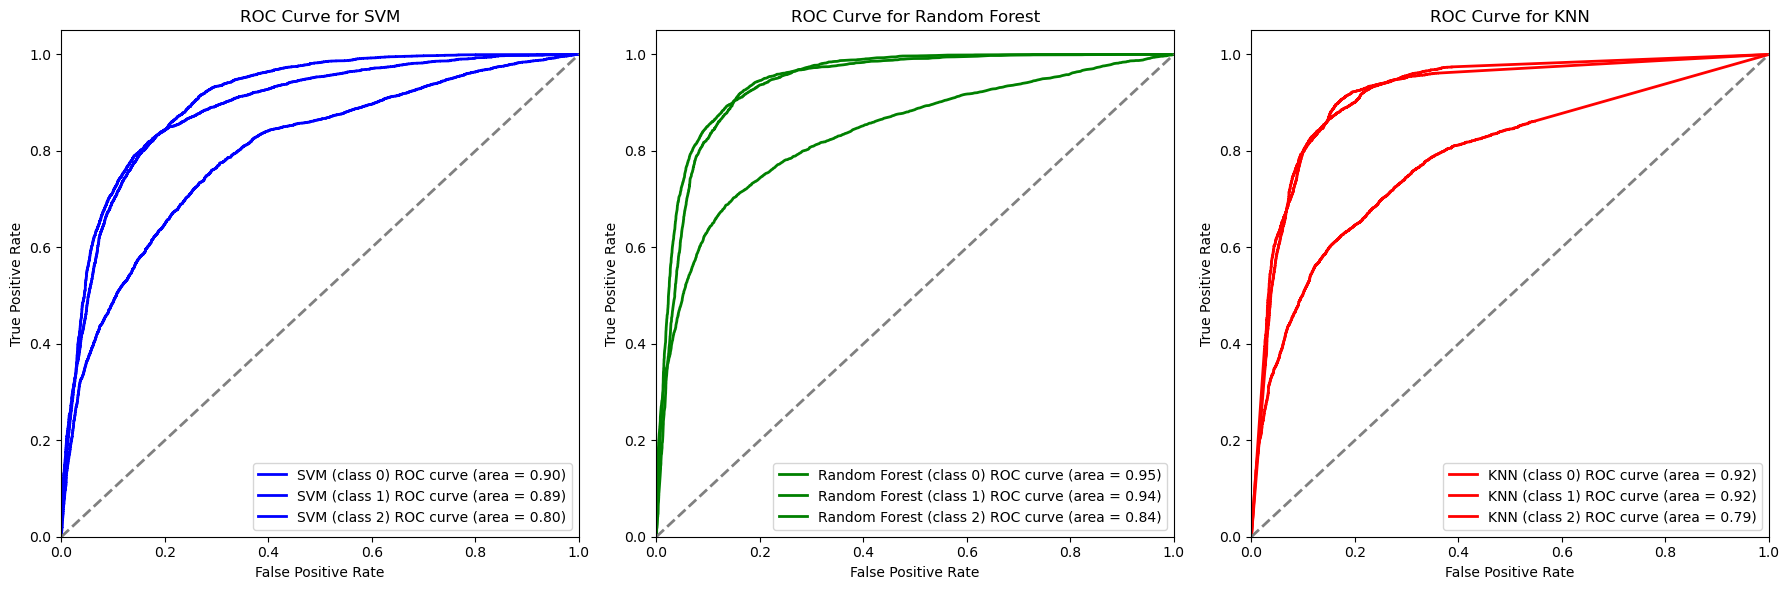

In [23]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Function to load a model
def load_model(model_path):
    with open(model_path, 'rb') as file:
        model = joblib.load(file)
    return model

# Function to evaluate the model
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# Function to plot the ROC curve
def plot_roc_curve(ax, model, X_val, y_val, model_name, color):
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_val)
    else:
        y_prob = model.decision_function(X_val)  # Use decision_function if predict_proba is not available

    # If it's a multi-class problem, binarize the labels
    y_val_bin = label_binarize(y_val, classes=[0, 1, 2])  # Modify this based on the number of classes you have
    fpr, tpr, roc_auc = {}, {}, {}
    
    for i in range(y_val_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        ax.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{model_name} (class {i}) ROC curve (area = {roc_auc[i]:.2f})')
    
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {model_name}')
    ax.legend(loc="lower right")

# Model paths
svm_model_path = './Best_model_svm.pkl'
rf_model_path = './best_model_rf.pkl'
knn_model_path = 'best_random_model_knn.pkl'

# Load models
svm_model = load_model(svm_model_path)
rf_model = load_model(rf_model_path)
knn_model = load_model(knn_model_path)

# Validation sets
X_val_svm = X_test_filtered_svm  # SVM validation set features
y_val_svm = y_test_encoded_svm  # SVM validation set labels

X_val_rf = X_test_rf  # RF validation set features
y_val_rf = y_test_rf  # RF validation set labels

X_val_knn = x_test_knn  # KNN validation set features
y_val_knn = y_test_knn  # KNN validation set labels

# Evaluate each model
svm_metrics = evaluate_model(svm_model, X_val_svm, y_val_svm)
rf_metrics = evaluate_model(rf_model, X_val_rf, y_val_rf)
knn_metrics = evaluate_model(knn_model, X_val_knn, y_val_knn)

# Print the results
print("SVM Model Performance:")
print(f"Accuracy: {svm_metrics[0]:.4f}, Precision: {svm_metrics[1]:.4f}, Recall: {svm_metrics[2]:.4f}, F1 Score: {svm_metrics[3]:.4f}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {rf_metrics[0]:.4f}, Precision: {rf_metrics[1]:.4f}, Recall: {rf_metrics[2]:.4f}, F1 Score: {rf_metrics[3]:.4f}")

print("\nKNN Model Performance:")
print(f"Accuracy: {knn_metrics[0]:.4f}, Precision: {knn_metrics[1]:.4f}, Recall: {knn_metrics[2]:.4f}, F1 Score: {knn_metrics[3]:.4f}")

# Create a 3x1 subplot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# SVM ROC
plot_roc_curve(axs[0], svm_model, X_val_svm, y_val_svm, "SVM", "blue")

# Random Forest ROC
plot_roc_curve(axs[1], rf_model, X_val_rf, y_val_rf, "Random Forest", "green")

# KNN ROC
plot_roc_curve(axs[2], knn_model, X_val_knn, y_val_knn, "KNN", "red")

# Adjust layout
plt.tight_layout()
plt.show()
